## First we Import all of the libraries that we need for this task

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick
import os

In [2]:
sns.set(rc={'figure.figsize':(20 ,5)})  # To change the default size of the plots

### To make sure that everything is organized, it's good to have a folder for the project. Then in this folder, we create a Data folder to store all of our datasets and a chart folder to store all of the graphs that we will create. 

In [3]:
# To avoid writing the path every time, we can create a constant variable for the base path. So also if in the future you want to change the folder name or move it to another folder, it would be easier to change just this variable.

BASEPATH_DATA='./Data'
BASEPATH_CHARTS='./Charts'

In [4]:
## The source of this dataset is:  https://ourworldindata.org/mental-health#article-licence

mental_df=pd.read_csv(os.path.join(BASEPATH_DATA , 'mental-illness-estimated-cases.csv'))

## Checking the dataframe

In [5]:
mental_df.shape

(6840, 8)

In [6]:
mental_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Data columns (total 8 columns):
 #   Column                                                                        Non-Null Count  Dtype  
---  ------                                                                        --------------  -----  
 0   Entity                                                                        6840 non-null   object 
 1   Code                                                                          6150 non-null   object 
 2   Year                                                                          6840 non-null   int64  
 3   Current number of cases of anxiety disorders, in both sexes aged all ages     6840 non-null   float64
 4   Current number of cases of depressive disorders, in both sexes aged all ages  6840 non-null   float64
 5   Current number of cases of schizophrenia, in both sexes aged all ages         6840 non-null   float64
 6   Current number of cases of bipola

In [7]:
mental_df.describe(include='all')

,Entity,Code,Year,"Current number of cases of anxiety disorders, in both sexes aged all ages","Current number of cases of depressive disorders, in both sexes aged all ages","Current number of cases of schizophrenia, in both sexes aged all ages","Current number of cases of bipolar disorder, in both sexes aged all ages","Current number of cases of eating disorders, in both sexes aged all ages"
count,6840,6150,6840.000000,6.840000e+03,6.840000e+03,6.840000e+03,6.840000e+03,6.840000e+03
unique,228,205,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN
freq,30,30,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2004.500000,6.449757e+06,5.851676e+06,4.950901e+05,8.395646e+05,2.941532e+05
std,NaN,NaN,8.656074,2.402240e+07,2.196947e+07,1.920941e+06,3.056843e+06,1.094398e+06
min,NaN,NaN,1990.000000,4.503519e+01,3.413094e+01,3.045460e+00,3.001961e+00,9.848079e-01
25%,NaN,NaN,1997.000000,5.547393e+04,6.159246e+04,3.679187e+03,9.237160e+03,2.591818e+03
50%,NaN,NaN,2004.500000,2.974344e+05,2.600903e+05,1.666993e+04,4.790359e+04,1.184113e+04
75%,NaN,NaN,2012.000000,1.330378e+06,1.024756e+06,7.776660e+04,2.007202e+05,5.157765e+04


In [8]:
mental_df.head(2)

,Entity,Code,Year,"Current number of cases of anxiety disorders, in both sexes aged all ages","Current number of cases of depressive disorders, in both sexes aged all ages","Current number of cases of schizophrenia, in both sexes aged all ages","Current number of cases of bipolar disorder, in both sexes aged all ages","Current number of cases of eating disorders, in both sexes aged all ages"
0,Afghanistan,AFG,1990,486787.00,439836.56,17880.188,65942.04,13171.437
1,Afghanistan,AFG,1991,532645.56,478890.22,19341.810,72660.38,14509.923


In [9]:
df=mental_df.copy()  # To keep our original dataframe safe!

In [10]:
df.columns

Index(['Entity', 'Code', 'Year',
       'Current number of cases of anxiety disorders, in both sexes aged all ages',
       'Current number of cases of depressive disorders, in both sexes aged all ages',
       'Current number of cases of schizophrenia, in both sexes aged all ages',
       'Current number of cases of bipolar disorder, in both sexes aged all ages',
       'Current number of cases of eating disorders, in both sexes aged all ages'],
      dtype='object')

In [11]:
# Renaming the columns to a the understandable but shorter names

df.rename(columns={'Entity':'country',
       'Current number of cases of anxiety disorders, in both sexes aged all ages':'anxiety',
       'Current number of cases of depressive disorders, in both sexes aged all ages':'depressive',
       'Current number of cases of schizophrenia, in both sexes aged all ages':'schizophrenia',
       'Current number of cases of bipolar disorder, in both sexes aged all ages':'bipolar',
       'Current number of cases of eating disorders, in both sexes aged all ages':'eating disorders'} , inplace=True)

In [12]:
df.head(2) # Now it looks better :) 

,country,Code,Year,anxiety,depressive,schizophrenia,bipolar,eating disorders
0,Afghanistan,AFG,1990,486787.00,439836.56,17880.188,65942.04,13171.437
1,Afghanistan,AFG,1991,532645.56,478890.22,19341.810,72660.38,14509.923


In [13]:
# Do we have any duplicates?

df[df.duplicated(['country','Year'])] 

,country,Code,Year,anxiety,depressive,schizophrenia,bipolar,eating disorders


In [14]:
# Which column has a null value?

df.isna().sum()[df.isna().sum()>0]  #  It is just the Code column, so we keep it in mind that if we want to make a plot or analysis based on the Code, we have to fill these null values

Code    690
dtype: int64

In [15]:
df[df.Code.isna()].country.unique() # The list of the countries that we don't have Code for them. Since we have no plan to make a plot based on the Code, we can ignore them for now. 

array(['African Region (WHO)', 'East Asia & Pacific (WB)',
       'Eastern Mediterranean Region (WHO)', 'England',
       'Europe & Central Asia (WB)', 'European Region (WHO)', 'G20',
       'High Income (WB)', 'Latin America & Caribbean (WB)',
       'Low Income (WB)', 'Lower Middle Income (WB)',
       'Middle East & North Africa (WB)', 'Middle Income (WB)',
       'North America (WB)', 'Northern Ireland', 'OECD Countries',
       'Region of the Americas (WHO)', 'Scotland', 'South Asia (WB)',
       'South-East Asia Region (WHO)', 'Sub-Saharan Africa (WB)', 'Wales',
       'Western Pacific Region (WHO)'], dtype=object)

<Axes: xlabel='country', ylabel='anxiety'>

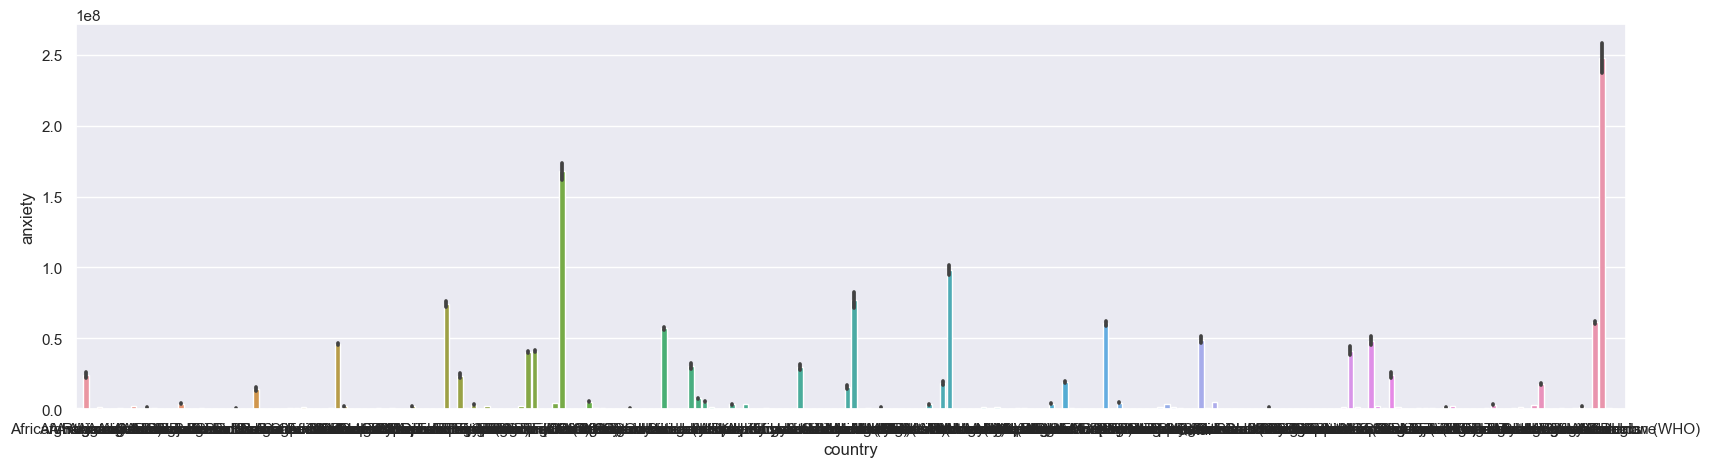

In [16]:
sns.barplot(df , x='country' , y='anxiety') # It's an example of a terrible graph! So we should limit the countries that we want to show OR choose another type of plot OR make a category of the countries

In [17]:
# We check the list of the countries, and we can see there are some records based on the group or region

country_category=[]
for c in df.country.unique():
    if '(WHO)' in c or  '(WB)' in c  :
        country_category.append(c)

In [18]:
country_category

['African Region (WHO)',
 'East Asia & Pacific (WB)',
 'Eastern Mediterranean Region (WHO)',
 'Europe & Central Asia (WB)',
 'European Region (WHO)',
 'High Income (WB)',
 'Latin America & Caribbean (WB)',
 'Low Income (WB)',
 'Lower Middle Income (WB)',
 'Middle East & North Africa (WB)',
 'Middle Income (WB)',
 'North America (WB)',
 'Region of the Americas (WHO)',
 'South Asia (WB)',
 'South-East Asia Region (WHO)',
 'Sub-Saharan Africa (WB)',
 'Western Pacific Region (WHO)']

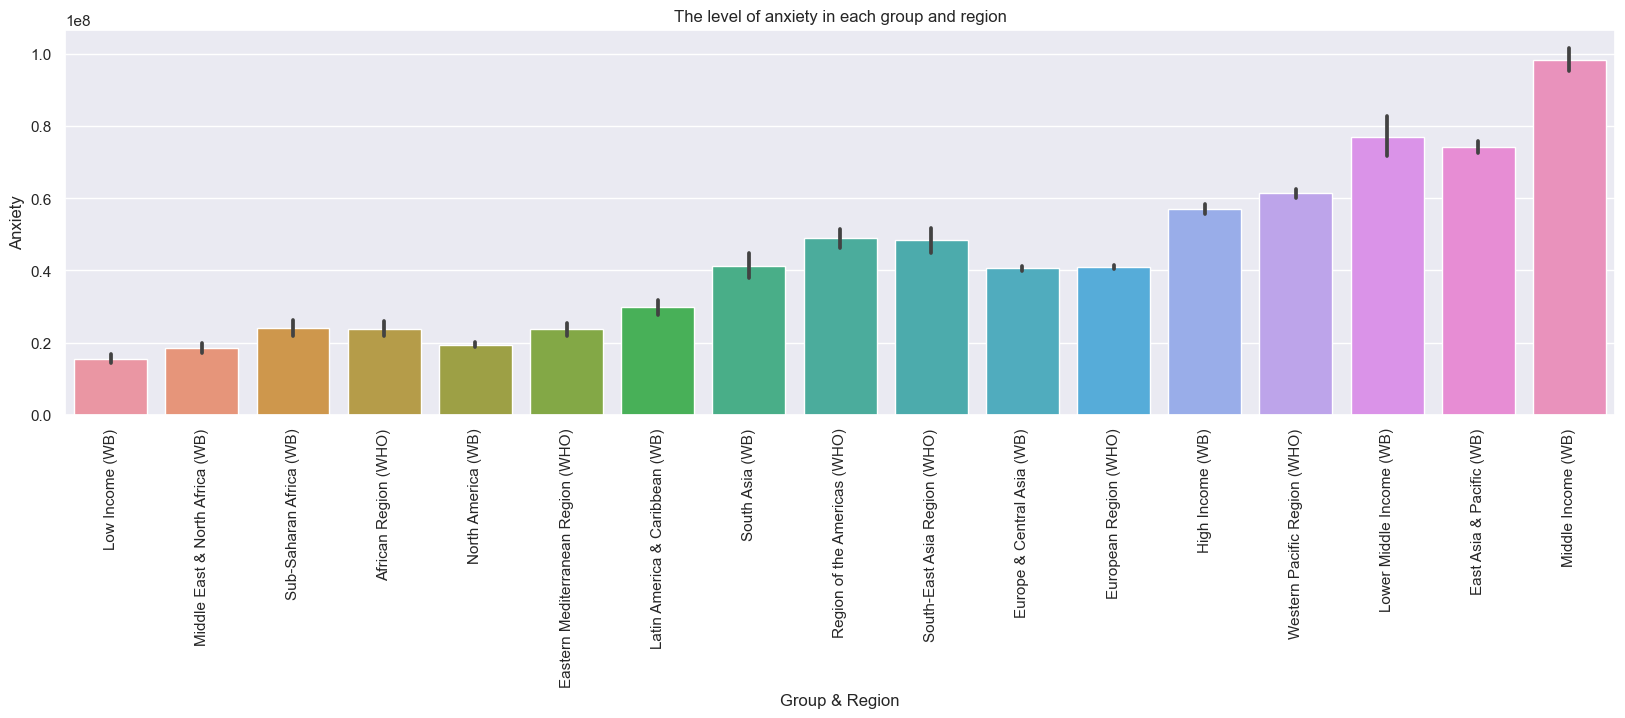

In [19]:
# So we've limited the data that we want to present

ax=sns.barplot(df[df.country.isin(country_category)].sort_values('anxiety') , x='country' , y='anxiety') #You see a line on the bars, and it's because we have data from multiple years. (If you don't want it, you can select just one year, or do an aggregation to show the avg per group)
ax.set_xticklabels(ax.get_xticklabels() , rotation=90)
ax.set_xlabel('Group & Region')
ax.set_ylabel('Anxiety')
plt.title('The level of anxiety in each group and region')
plt.show()

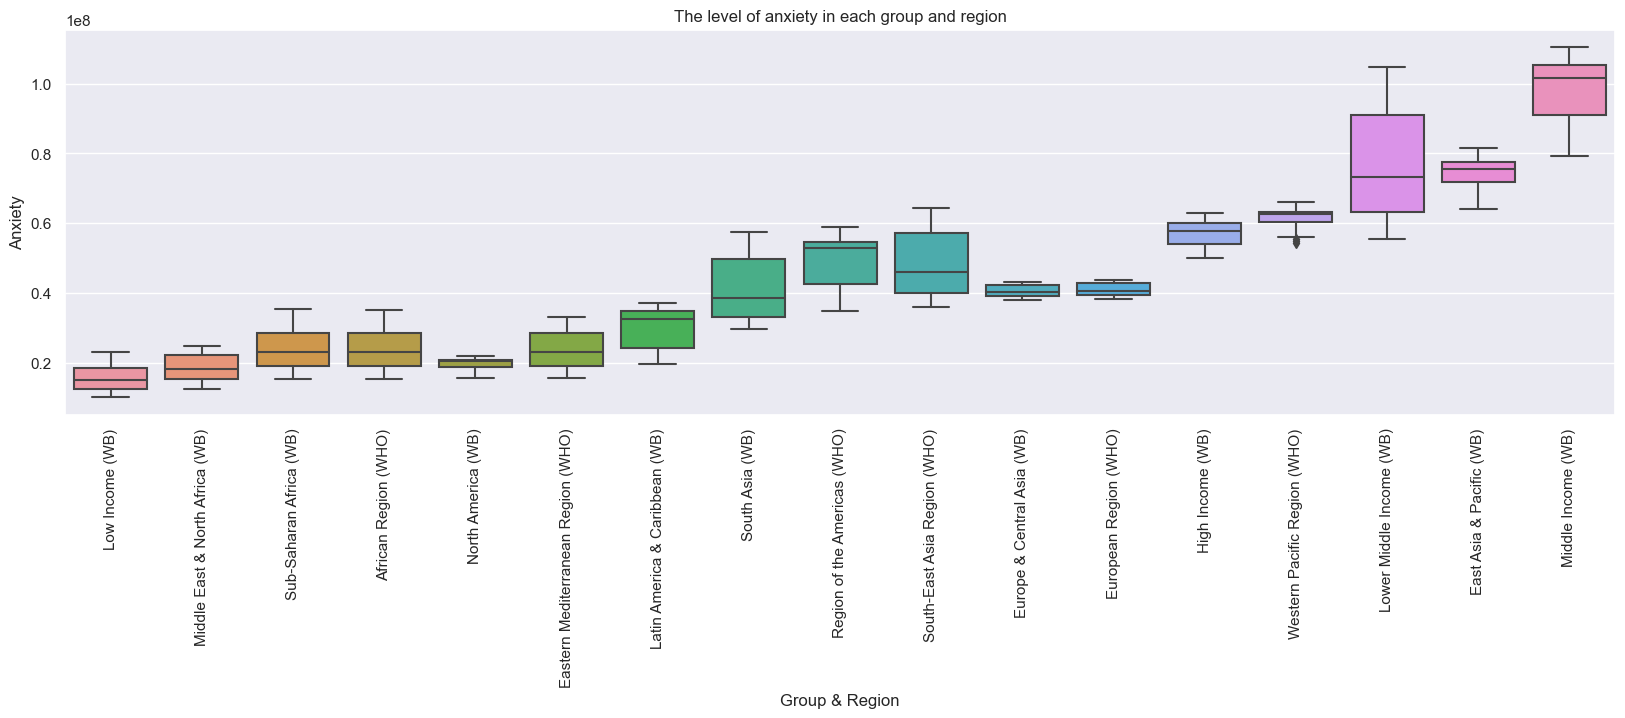

In [20]:
# Or having a boxplot is even better :) 

ax=sns.boxplot(df[df.country.isin(country_category)].sort_values('anxiety') , x='country' , y='anxiety') #You see a line on the bars, and it's because we have data from multiple years. (If you don't want it, you can select just one year, or do an aggregation to show the avg per group)
ax.set_xticklabels(ax.get_xticklabels() , rotation=90)
ax.set_xlabel('Group & Region')
ax.set_ylabel('Anxiety')
plt.title('The level of anxiety in each group and region')
plt.show()

## Having all of the disorder types in one column

In [21]:
df.head(2)

,country,Code,Year,anxiety,depressive,schizophrenia,bipolar,eating disorders
0,Afghanistan,AFG,1990,486787.00,439836.56,17880.188,65942.04,13171.437
1,Afghanistan,AFG,1991,532645.56,478890.22,19341.810,72660.38,14509.923


In [22]:
# Which columns do we want to keep as columns in the new data frame? 'country', 'Code', 'Year', So we put them in id_vars. All of the other columns that are not in this list will melt into the rows

df_melted=df.melt(id_vars=['country','Code','Year'] , var_name='disorder')

In [23]:
df_melted

,country,Code,Year,disorder,value
0,Afghanistan,AFG,1990,anxiety,486787.000
1,Afghanistan,AFG,1991,anxiety,532645.560
2,Afghanistan,AFG,1992,anxiety,609249.300
3,Afghanistan,AFG,1993,anxiety,662644.500
4,Afghanistan,AFG,1994,anxiety,685973.400
...,...,...,...,...,...
34195,Zimbabwe,ZWE,2015,eating disorders,14528.781
34196,Zimbabwe,ZWE,2016,eating disorders,14910.707
34197,Zimbabwe,ZWE,2017,eating disorders,15247.616
34198,Zimbabwe,ZWE,2018,eating disorders,15586.468


In [24]:
df_melted.disorder.unique()

array(['anxiety', 'depressive', 'schizophrenia', 'bipolar',
       'eating disorders'], dtype=object)

In [25]:
# It is cool and more understandable to create a color palette for the items you want to show. So keep the color consistent throughout your project
# You can choose the color from : https://coolors.co/palettes/trending

disorder_col_map={'anxiety':'#264653', 'depressive':'#2a9d8f', 'schizophrenia':'#e9c46a', 'bipolar':'#f4a261',
       'eating disorders':'#e76f51'}

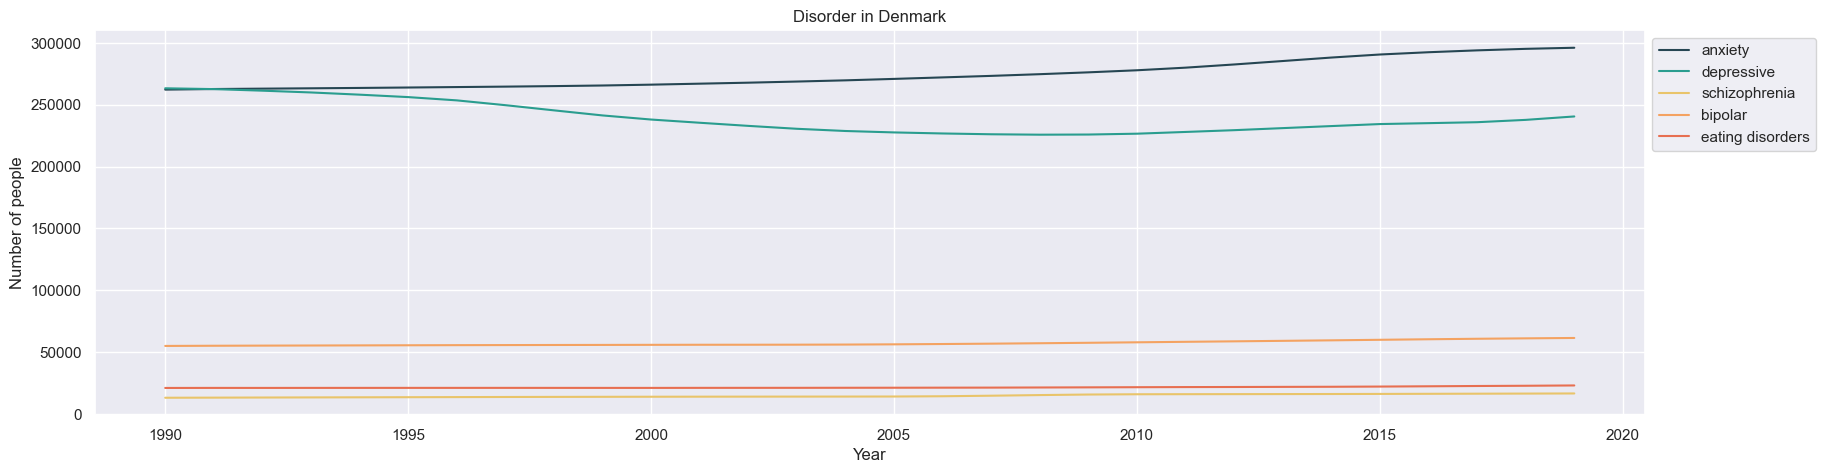

In [26]:
plt.figure(figsize=(20,5))
ax=sns.lineplot(df_melted[df_melted.country=='Denmark'] , x='Year' , y='value' , hue='disorder' , palette=disorder_col_map)
plt.legend(bbox_to_anchor=(1,1))
plt.title('Disorder in Denmark')
ax.set_xlabel('Year')
ax.set_ylabel('Number of people')
plt.show()

## Define a function to create a graph for us

In [27]:
def disorder_line_plot(country_name , disorder_list):
    
    ax=sns.lineplot(df_melted[(df_melted.country==country_name)&(df_melted.disorder.isin(disorder_list))] , x='Year' , y='value' , hue='disorder' , palette=disorder_col_map)
    plt.legend(bbox_to_anchor=(1,1))
    plt.title('Disorder in %s'%country_name)
    ax.set_xlabel('Year')
    ax.set_ylabel('Number of people')
    plt.show()

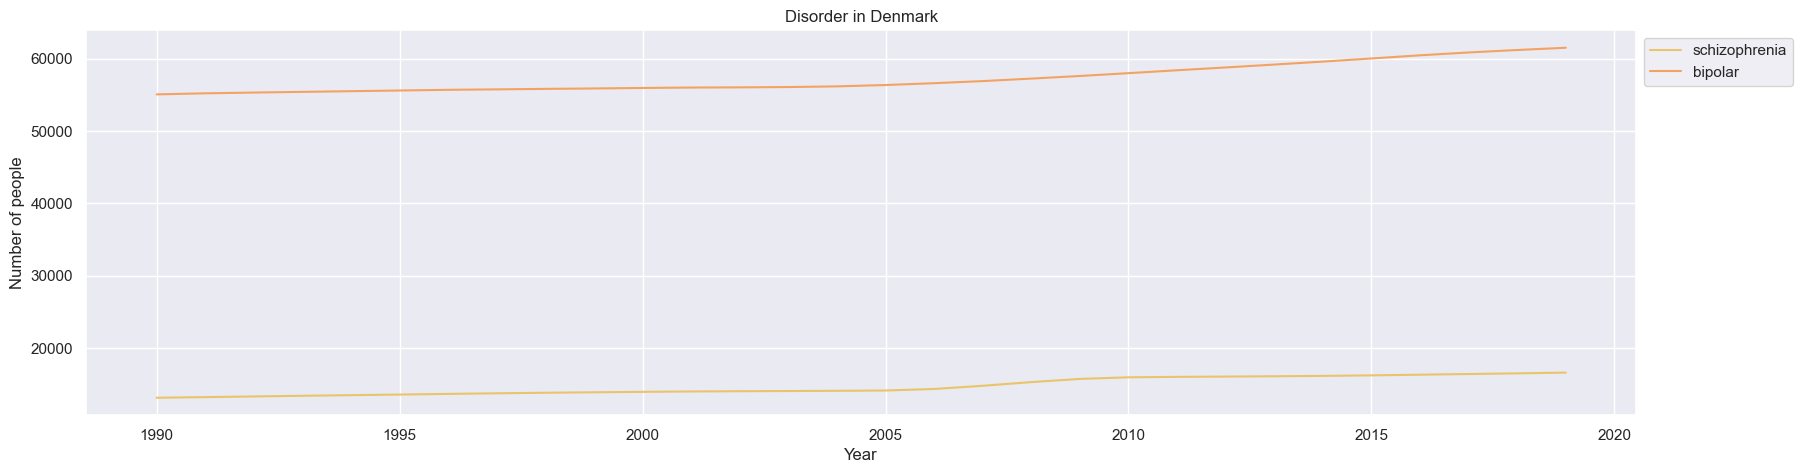

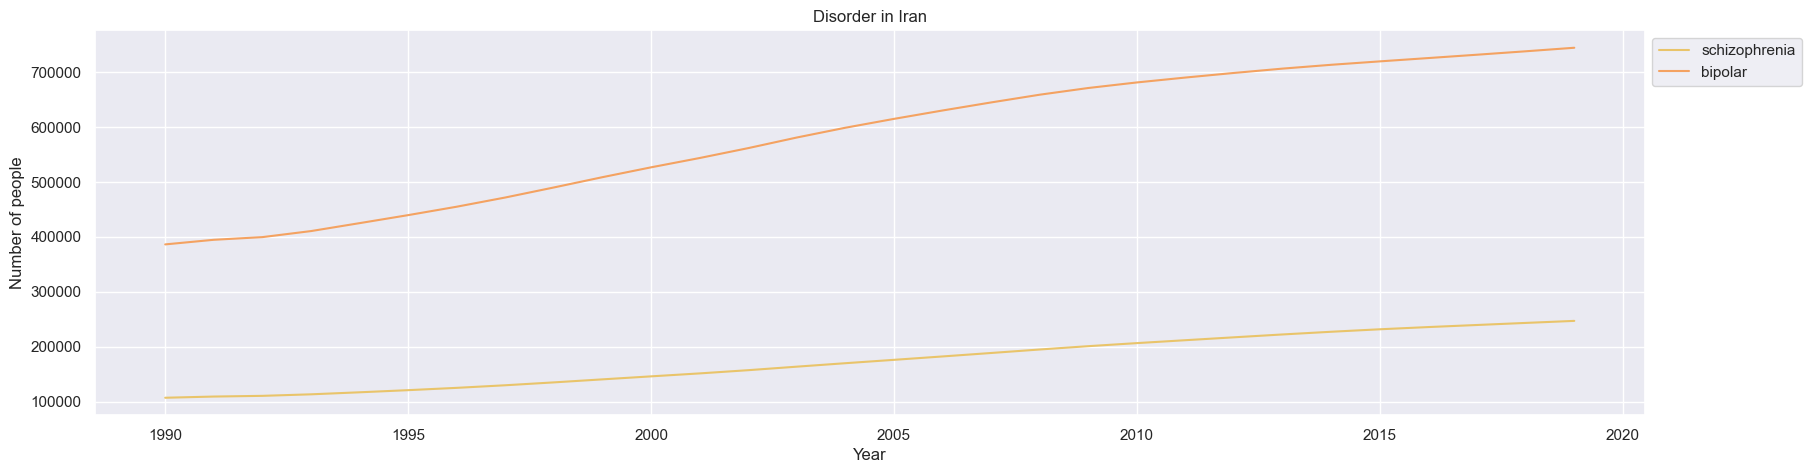

In [28]:
for c in ['Denmark','Iran']:
    disorder_line_plot(c , ['schizophrenia', 'bipolar'])

In [29]:
# Just to compare 4 countries toghether in 2019
limited_df=df_melted[(df_melted.country.isin(['Finland','Denmark','Iran','Cuba' ]))&(df_melted.Year==2019)].copy()

In [30]:
limited_df.head(1)

,country,Code,Year,disorder,value
1409,Cuba,CUB,2019,anxiety,533915.94


Text(0.5, 1.0, 'Disorder per countries with the actual value')

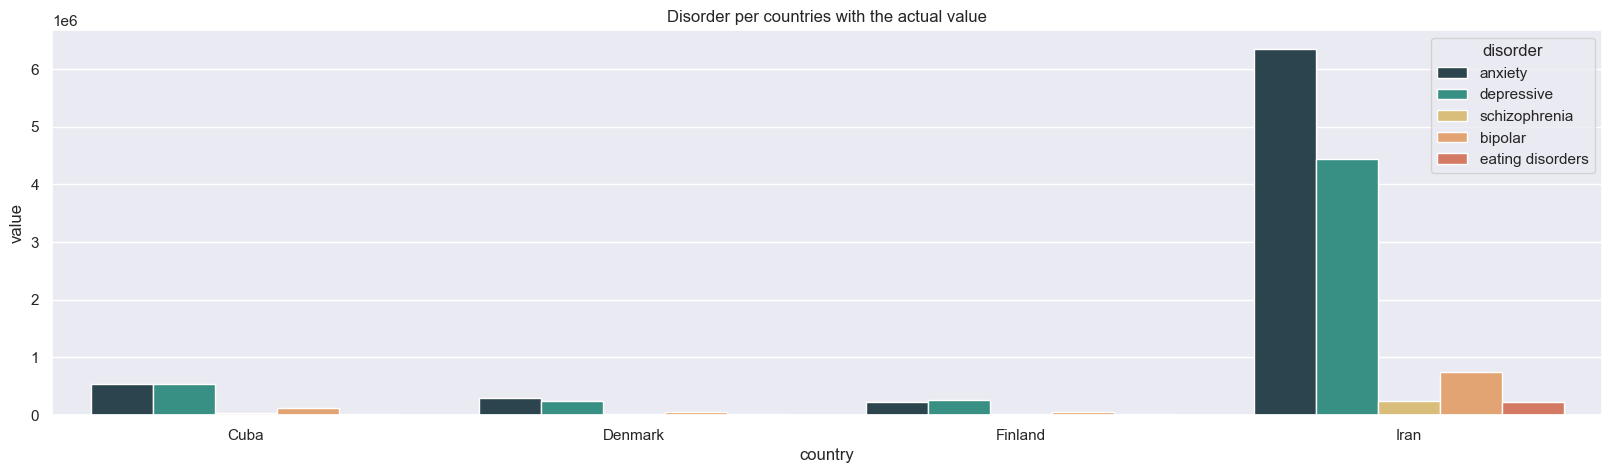

In [46]:
sns.barplot(limited_df , x='country' , y='value' , hue='disorder', palette=disorder_col_map) # It's obvious that since the population is different, we can not compare them like that. So what should we do?
plt.title('Disorder per countries with the actual value')

### We can find the Percentage of Mental disorders based on the countries population

In [47]:
population_dict={'Finland':5500000 ,'Denmark':5800000 ,'Iran':85000000 ,'Cuba':11300000 }

In [48]:
limited_df['population']=limited_df['country'].map(population_dict)

In [49]:
limited_df['value_pct']=((limited_df['value']/limited_df['population'])*100).round(3)

Text(0.5, 1.0, 'Disorder per countries with the actual value')

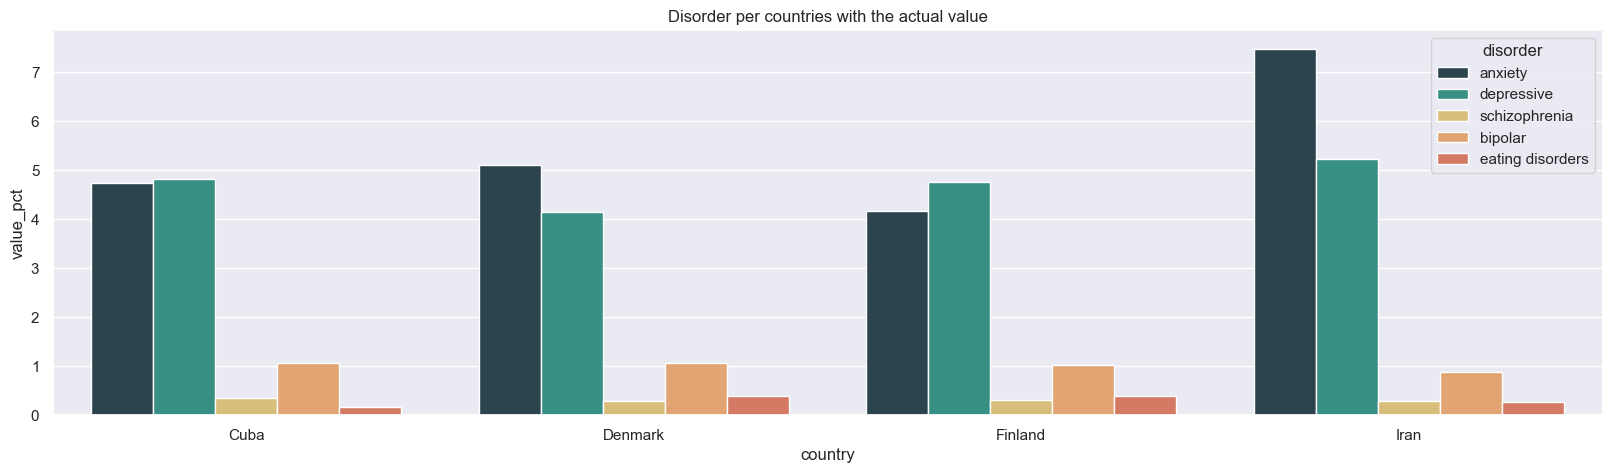

In [50]:
ax=sns.barplot(limited_df , x='country' , y='value_pct' , hue='disorder', palette=disorder_col_map) 
plt.title('Disorder per countries with the actual value')

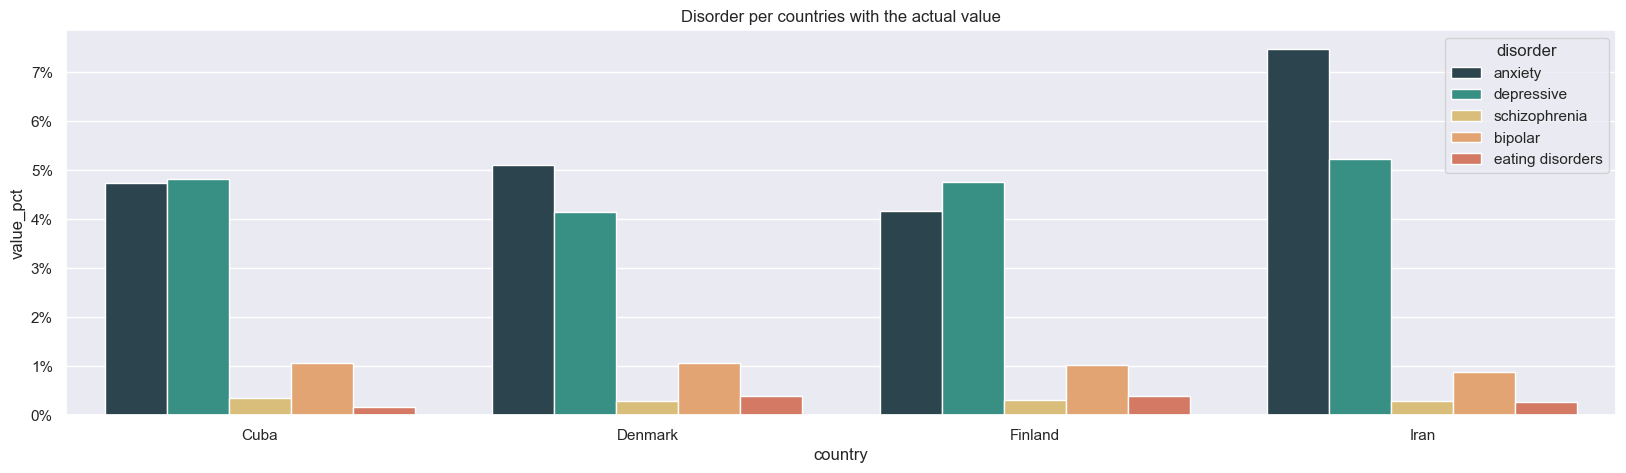

In [51]:
# But we also like to see the ytick labels in percentage

ax=sns.barplot(limited_df , x='country' , y='value_pct' , hue='disorder' , palette=disorder_col_map) 
plt.title('Disorder per countries with the actual value')

def format_percent(x, pos):
    return '{:.0f}%'.format(x)

# Apply our format_percent function to the y-axis tick labels
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(format_percent))

plt.show()

In [52]:
#Now suddenly we are curious about India!

ind_anx_df=df_melted[(df_melted.country=='India')].copy()

In [53]:
ind_anx_df.head(1)

,country,Code,Year,disorder,value
2700,India,IND,1990,anxiety,22383792.0


In [54]:
disorder_col_map

{'anxiety': '#264653',
 'depressive': '#2a9d8f',
 'schizophrenia': '#e9c46a',
 'bipolar': '#f4a261',
 'eating disorders': '#e76f51'}

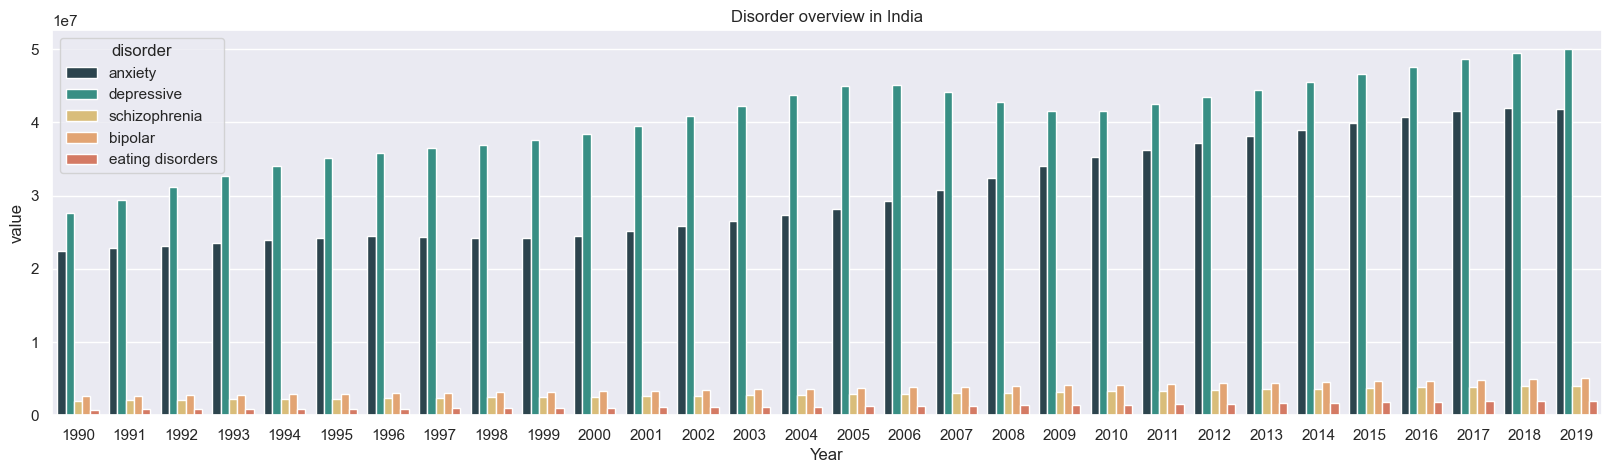

In [55]:
sns.barplot(ind_anx_df , x='Year' , y='value' , hue='disorder' , palette=disorder_col_map)
plt.title('Disorder overview in India')
plt.show()

In [56]:
# What about the world in general???

world_df=df[df.country=='World']

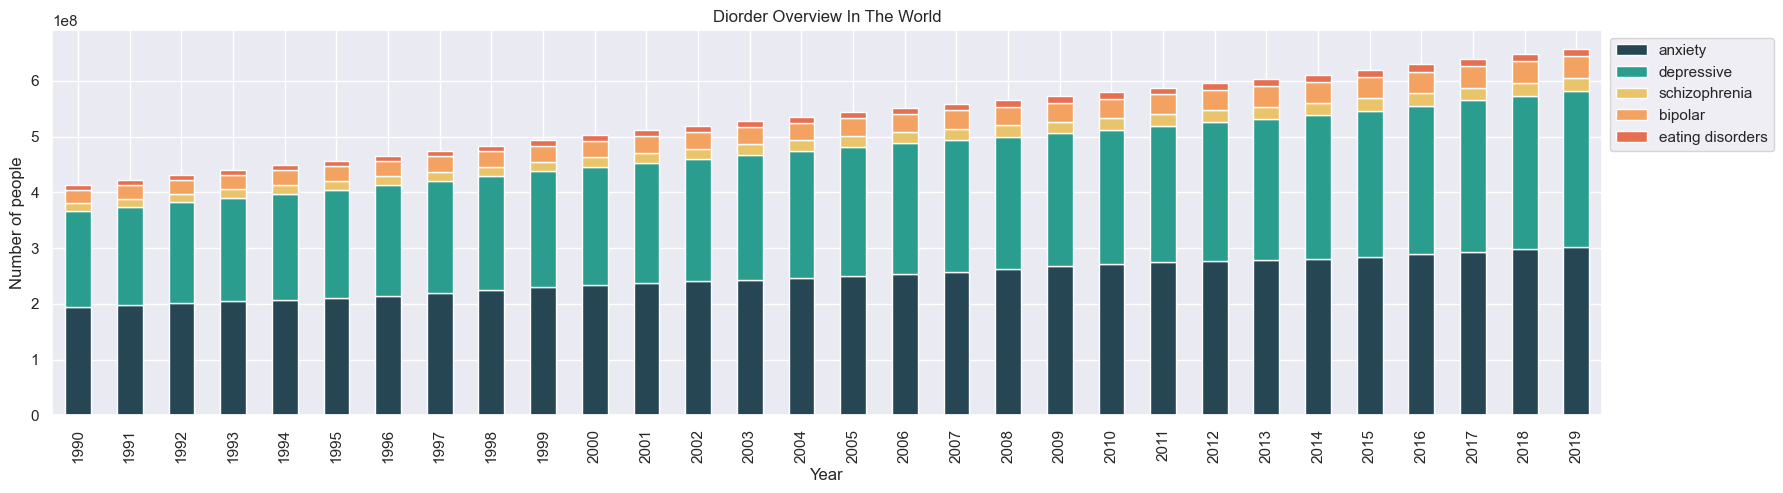

In [57]:
# Make a stack plot with Pandas and save the png file

ax=world_df.set_index('Year').plot(kind='bar' , stacked=True , color=disorder_col_map) 
plt.title('Diorder Overview In The World')
ax.set_ylabel('Number of people')
plt.legend(loc='best' , bbox_to_anchor=(1 , 1))
plt.savefig(os.path.join(BASEPATH_CHARTS, 'Diorder Overview In The World.png') , dpi=500 , bbox_inches="tight", pad_inches=0.2)
plt.show()

In [58]:
# We also like to save our dataframe in an axcel file

world_df.to_excel(os.path.join(BASEPATH_DATA , 'Mental Disorder in the Worls.xlsx') , index=False)